In [1]:
import geopandas as gpd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import os
import pandas as pd
import seaborn as sns

In [2]:
############## analysis ##################3 
dir_ = "data/VA_data/"
df = pd.read_csv(dir_ + "plan_metrics.csv")

In [3]:
df2 = pd.read_csv(dir_ + "districts_stats/ATG17.csv")
df3 = pd.read_csv(dir_ + "districts_stats/PRS16.csv")
pop = pd.read_csv(dir_ + "districts_stats/population.csv")

In [4]:
df2.head()

,perc_dem_vote_district_1,perc_dem_vote_district_2,perc_dem_vote_district_3,perc_dem_vote_district_4,perc_dem_vote_district_5,perc_dem_vote_district_6,perc_dem_vote_district_7,perc_dem_vote_district_8,perc_dem_vote_district_9,perc_dem_vote_district_10,perc_dem_vote_district_11
0,0.341554,0.354286,0.424251,0.446207,0.452867,0.532229,0.605682,0.605971,0.631388,0.691353,0.720516
1,0.341554,0.354286,0.424251,0.446207,0.452867,0.532229,0.601481,0.605971,0.631388,0.691353,0.721181
2,0.341554,0.354286,0.424251,0.444413,0.446207,0.532229,0.601481,0.621757,0.631388,0.691353,0.721181
3,0.341554,0.354286,0.424251,0.444413,0.446207,0.532229,0.600422,0.621757,0.631388,0.691353,0.725073
4,0.341554,0.354286,0.424251,0.444413,0.446207,0.532229,0.621757,0.631388,0.633284,0.661928,0.725073


In [51]:
df3.head()

,perc_dem_vote_district_1,perc_dem_vote_district_2,perc_dem_vote_district_3,perc_dem_vote_district_4,perc_dem_vote_district_5,perc_dem_vote_district_6,perc_dem_vote_district_7,perc_dem_vote_district_8,perc_dem_vote_district_9,perc_dem_vote_district_10,perc_dem_vote_district_11
0,0.31169,0.353166,0.414073,0.42116,0.458686,0.513102,0.614181,0.620050,0.625966,0.701093,0.747190
1,0.31169,0.353166,0.414073,0.42116,0.458686,0.513102,0.609492,0.620050,0.625966,0.701093,0.748226
2,0.31169,0.353166,0.414073,0.42116,0.446518,0.513102,0.609492,0.625966,0.639007,0.701093,0.748226
3,0.31169,0.353166,0.414073,0.42116,0.446518,0.513102,0.609392,0.625966,0.639007,0.701093,0.751860
4,0.31169,0.353166,0.414073,0.42116,0.446518,0.513102,0.625966,0.639007,0.646484,0.664911,0.751860


In [14]:
def get_most_democratic_district(row):
    m = 0
    if row["perc_dem_vote_district_1"] >= m:
        m = row["perc_dem_vote_district_1"]
    if row["perc_dem_vote_district_2"] >= m:
        m = row["perc_dem_vote_district_2"]
    if row["perc_dem_vote_district_3"] >= m:
        m = row["perc_dem_vote_district_3"]
    if row["perc_dem_vote_district_4"] >= m:
        m = row["perc_dem_vote_district_4"]
    if row["perc_dem_vote_district_5"] >= m:
        m = row["perc_dem_vote_district_5"]
    if row["perc_dem_vote_district_6"] >= m:
        m = row["perc_dem_vote_district_6"]
    if row["perc_dem_vote_district_7"] >= m:
        m = row["perc_dem_vote_district_7"]
    if row["perc_dem_vote_district_8"] >= m:
        m = row["perc_dem_vote_district_8"]
    if row["perc_dem_vote_district_9"] >= m:
        m = row["perc_dem_vote_district_9"]
    if row["perc_dem_vote_district_10"] >= m:
        m = row["perc_dem_vote_district_10"]
    if row["perc_dem_vote_district_11"] >= m:
        m = row["perc_dem_vote_district_11"]
    return(m)

In [6]:
def add_vote_metric(df_orig, df_int):
    df_orig['n_vote_dem'] = df_int['perc_dem_vote_district_1'] * pop['pop_district_1'] +\
                        df_int['perc_dem_vote_district_2'] * pop['pop_district_2']+\
                        df_int['perc_dem_vote_district_3'] * pop['pop_district_3']+\
                        df_int['perc_dem_vote_district_4'] * pop['pop_district_4']+\
                        df_int['perc_dem_vote_district_5'] * pop['pop_district_5']+\
                        df_int['perc_dem_vote_district_6'] * pop['pop_district_6']+\
                        df_int['perc_dem_vote_district_7'] * pop['pop_district_7']+\
                        df_int['perc_dem_vote_district_8'] * pop['pop_district_8']+\
                        df_int['perc_dem_vote_district_9'] * pop['pop_district_9']+\
                        df_int['perc_dem_vote_district_10'] * pop['pop_district_10']+\
                        df_int['perc_dem_vote_district_11'] * pop['pop_district_11']

    df_orig['total_n_votes'] = pop['pop_district_1'] +\
                        pop['pop_district_2']+\
                        pop['pop_district_3']+\
                        pop['pop_district_4']+\
                        pop['pop_district_5']+\
                        pop['pop_district_6']+\
                        pop['pop_district_7']+\
                        pop['pop_district_8']+\
                        pop['pop_district_9']+\
                        pop['pop_district_10']+\
                        pop['pop_district_11']

    df_orig['mean_dem_distric_vote_share'] = (df_int['perc_dem_vote_district_1'] +\
                                        df_int['perc_dem_vote_district_2'] +\
                                        df_int['perc_dem_vote_district_3'] +\
                                        df_int['perc_dem_vote_district_4'] +\
                                        df_int['perc_dem_vote_district_5'] +\
                                        df_int['perc_dem_vote_district_6'] +\
                                        df_int['perc_dem_vote_district_7'] +\
                                        df_int['perc_dem_vote_district_8'] +\
                                        df_int['perc_dem_vote_district_9'] +\
                                        df_int['perc_dem_vote_district_10']+\
                                        df_int['perc_dem_vote_district_11']) / 11
    
    df_orig['perc_dem_vote'] = df_orig['n_vote_dem'] / df_orig['total_n_votes']
    return(df_orig)

In [7]:
df_pres = add_vote_metric(df, df3)
df_atg = add_vote_metric(df, df2)

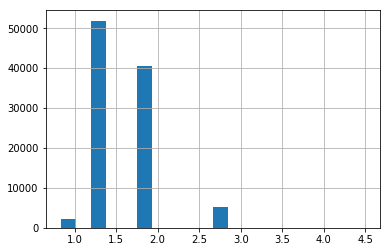

In [54]:
df2['dem_seats'] = (df2['perc_dem_vote_district_1'] >= 0.5).astype('int64')+\
                    (df2['perc_dem_vote_district_2'] >= 0.5).astype('int64')+\
                    (df2['perc_dem_vote_district_3'] >= 0.5).astype('int64')+\
                    (df2['perc_dem_vote_district_4'] >= 0.5).astype('int64')+\
                    (df2['perc_dem_vote_district_5'] >= 0.5).astype('int64')+\
                    (df2['perc_dem_vote_district_6'] >= 0.5).astype('int64')+\
                    (df2['perc_dem_vote_district_7'] >= 0.5).astype('int64')+\
                    (df2['perc_dem_vote_district_8'] >= 0.5).astype('int64')+\
                    (df2['perc_dem_vote_district_9'] >= 0.5).astype('int64')+\
                    (df2['perc_dem_vote_district_10'] >= 0.5).astype('int64')+\
                    (df2['perc_dem_vote_district_11'] >= 0.5).astype('int64')
                    
df2['rep_seats'] = 11-df2['dem_seats']
df2['dem_to_rep_ratio'] = df2['dem_seats'] / df2['rep_seats']

df2['dem_to_rep_ratio'].hist(bins = 20)

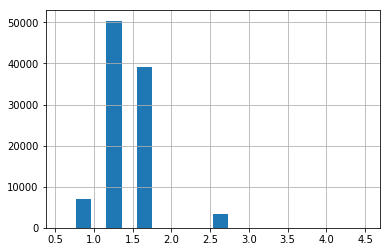

In [55]:
df3['dem_seats'] = (df3['perc_dem_vote_district_1'] >= 0.5).astype('int64')+\
                    (df3['perc_dem_vote_district_2'] >= 0.5).astype('int64')+\
                    (df3['perc_dem_vote_district_3'] >= 0.5).astype('int64')+\
                    (df3['perc_dem_vote_district_4'] >= 0.5).astype('int64')+\
                    (df3['perc_dem_vote_district_5'] >= 0.5).astype('int64')+\
                    (df3['perc_dem_vote_district_6'] >= 0.5).astype('int64')+\
                    (df3['perc_dem_vote_district_7'] >= 0.5).astype('int64')+\
                    (df3['perc_dem_vote_district_8'] >= 0.5).astype('int64')+\
                    (df3['perc_dem_vote_district_9'] >= 0.5).astype('int64')+\
                    (df3['perc_dem_vote_district_10'] >= 0.5).astype('int64')+\
                    (df3['perc_dem_vote_district_11'] >= 0.5).astype('int64')
                    
df3['rep_seats'] = 11-df3['dem_seats']
df3['dem_to_rep_ratio'] = df3['dem_seats'] / df3['rep_seats']

df3['dem_to_rep_ratio'].hist(bins = 20)

# Focus on Attorney General 2017 elections in VA

In [18]:
df_atg["most_democratic_district_vote_share"] = df2.apply(lambda row: (row["perc_dem_vote_district_11"]), axis=1)

In [19]:
df_atg

,election_DLSBVAP_egs,election_DLSBVAP_hmss,election_DLSBVAP_mms,election_DOJBVAP_egs,election_DOJBVAP_hmss,election_DOJBVAP_mms,election_SEN18_egs,election_SEN18_hmss,election_SEN18_mms,election_GOV18_egs,...,election_PRS16_egs,election_PRS16_hmss,election_PRS16_mms,nb_splits,nb_cuts,n_vote_dem,total_n_votes,mean_dem_distric_vote_share,perc_dem_vote,most_democratic_district_vote_share
0,-0.125258,0.0,0.019720,-0.125351,0.0,0.018979,0.104114,6.0,-0.001315,0.032291,...,0.009752,6.0,0.012385,49.0,591.0,4.226266e+06,8001024.0,0.527846,0.528216,0.720516
1,-0.125258,0.0,0.019855,-0.125351,0.0,0.019113,0.104114,6.0,-0.001572,0.032291,...,0.009752,6.0,0.012053,49.0,570.0,4.227757e+06,8001024.0,0.527524,0.528402,0.721181
2,-0.125258,0.0,0.019855,-0.125351,0.0,0.019113,0.109248,6.0,-0.000776,0.037131,...,0.013527,6.0,0.012670,51.0,606.0,4.233061e+06,8001024.0,0.528191,0.529065,0.721181
3,-0.125258,0.0,0.019793,-0.125351,0.0,0.019051,0.109248,6.0,-0.000522,0.037131,...,0.013527,6.0,0.012991,51.0,606.0,4.231596e+06,8001024.0,0.528448,0.528882,0.725073
4,-0.125258,0.0,0.019589,-0.125351,0.0,0.018849,0.109248,6.0,-0.000284,0.037131,...,0.013527,6.0,0.013074,51.0,580.0,4.234480e+06,8001024.0,0.528761,0.529242,0.725073
5,-0.125258,0.0,0.019564,-0.125351,0.0,0.018823,0.109248,6.0,-0.000237,0.037131,...,0.013527,6.0,0.013125,50.0,570.0,4.234735e+06,8001024.0,0.528794,0.529274,0.725073
6,-0.125258,0.0,0.019544,-0.125351,0.0,0.018803,0.013205,7.0,-0.000767,0.033251,...,0.010827,6.0,0.012674,48.0,536.0,4.231735e+06,8001024.0,0.528288,0.528899,0.725073
7,-0.125258,0.0,0.046975,-0.125351,0.0,0.047496,-0.079682,8.0,-0.000691,0.033251,...,0.010827,6.0,0.012808,49.0,580.0,4.234081e+06,8001024.0,0.528288,0.529192,0.725073
8,-0.125258,0.0,0.015114,-0.125351,0.0,0.014188,-0.085723,8.0,-0.001034,0.033251,...,0.010827,6.0,0.012379,49.0,563.0,4.230088e+06,8001024.0,0.528086,0.528693,0.725073
9,-0.125258,0.0,0.015271,-0.125351,0.0,0.014343,-0.085723,8.0,-0.029319,0.033251,...,0.010827,6.0,-0.020279,49.0,588.0,4.228191e+06,8001024.0,0.527752,0.528456,0.725073


In [17]:
df_atg_exp = df_atg[['election_ATG17_egs',
     'election_ATG17_hmss',
     'election_ATG17_mms',
     'nb_splits',
     'nb_cuts',
    'perc_dem_vote',
    'most_democratic_district_vote_share',
    'n_vote_dem',
    'total_n_votes',
   'mean_dem_distric_vote_share']]\
.rename(columns = {
    'election_ATG17_egs' : 'egs',
    'election_ATG17_hmss': 'hmss',
    'election_ATG17_mms': 'mms'
})\
.to_csv(dir_ + "plan_metrics_ATG17.csv", index = False)

In [40]:
df_pres[['election_PRS16_egs',
     'election_PRS16_hmss',
     'election_PRS16_mms',
     'nb_splits',
     'nb_cuts',
    'perc_dem_vote',
    'n_vote_dem',
    'total_n_votes',
   'mean_dem_distric_vote_share']].to_csv(dir_ + "plan_metrics_PRS16.csv")

In [18]:
list(df)
df = df[['election_ATG17_egs',
         'election_ATG17_hmss',
         'election_ATG17_mms',
         'nb_splits',
         'nb_cuts',
        'perc_dem_vote',
        'mean_dem_distric_vote_share']]

In [41]:
list(df)
df = df[['election_PRS16_egs',
         'election_PRS16_hmss',
         'election_PRS16_mms',
         'nb_splits',
         'nb_cuts',
        'perc_dem_vote',
        'mean_dem_distric_vote_share']]

# First, plot histograms of each metric
---
# for ATG17

## Efficiency gap

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


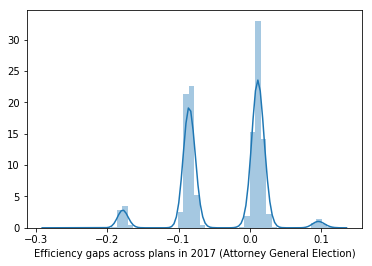

In [4]:
sns.distplot(df['election_ATG17_egs'],
             rug=False, 
             hist=True,
             kde=True,
             axlabel = 'Efficiency gaps across plans in 2017 (Attorney General Election)'
            )

## Number of seats won by the Dem party

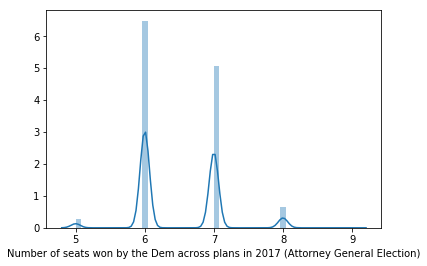

In [5]:
sns.distplot(df['election_ATG17_hmss'],
             rug=False, 
             hist=True,
             kde=True,
             axlabel = 'Number of seats won by the Dem across plans in 2017 (Attorney General Election)'
            )

## Mean-Median

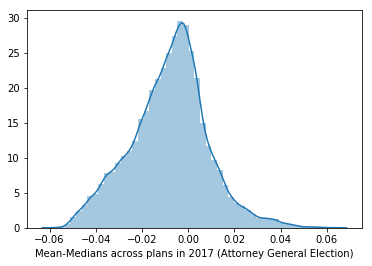

In [6]:
sns.distplot(df['election_ATG17_mms'],
             rug=False, 
             hist=True,
             kde=True,
             axlabel = 'Mean-Medians across plans in 2017 (Attorney General Election)')

## Number of splits

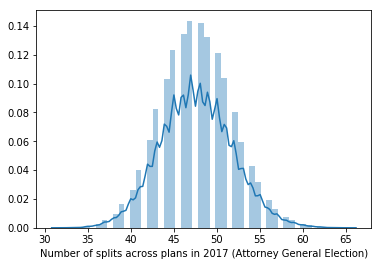

In [7]:
sns.distplot(df['nb_splits'],
             rug=False, 
             hist=True,
             kde=True,
             axlabel = 'Number of splits across plans in 2017 (Attorney General Election)')

## Number of cuts

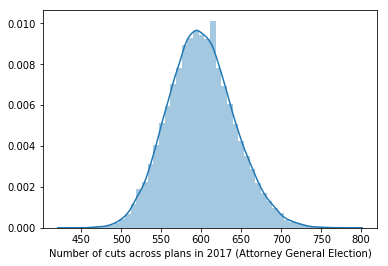

In [8]:
sns.distplot(df['nb_cuts'],
             rug=False, 
             hist=True,
             kde=True,
             axlabel = 'Number of cuts across plans in 2017 (Attorney General Election)')

## Percentage of votes for Democrats

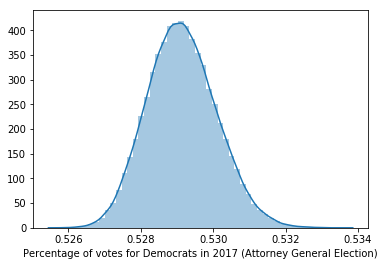

In [51]:
sns.distplot(df['perc_dem_vote'],
             rug=False, 
             hist=True,
             kde=True,
             axlabel = 'Percentage of votes for Democrats in 2017 (Attorney General Election)')

## Percentage of votes for Democrats in average per district

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


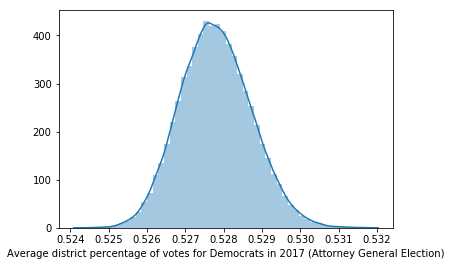

In [19]:
sns.distplot(df['mean_dem_distric_vote_share'],
             rug=False, 
             hist=True,
             kde=True,
             axlabel = 'Average district percentage of votes for Democrats in 2017 (Attorney General Election)')

# First, plot histograms of each metric
---
# for PRS16

## Efficiency gap

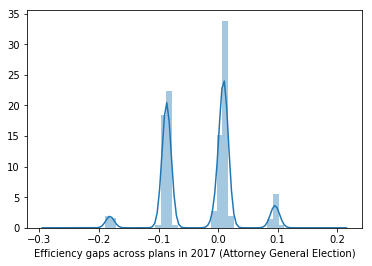

In [42]:
sns.distplot(df['election_PRS16_egs'],
             rug=False, 
             hist=True,
             kde=True,
             axlabel = 'Efficiency gaps across plans in 2017 (Attorney General Election)'
            )

## Number of seats won by the Dem party

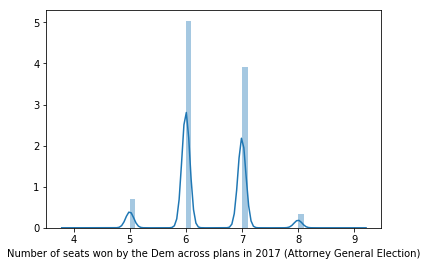

In [43]:
sns.distplot(df['election_PRS16_hmss'],
             rug=False, 
             hist=True,
             kde=True,
             axlabel = 'Number of seats won by the Dem across plans in 2017 (Attorney General Election)'
            )

## Mean-Median

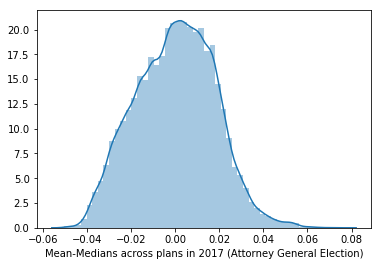

In [44]:
sns.distplot(df['election_PRS16_mms'],
             rug=False, 
             hist=True,
             kde=True,
             axlabel = 'Mean-Medians across plans in 2017 (Attorney General Election)')

## Number of splits

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


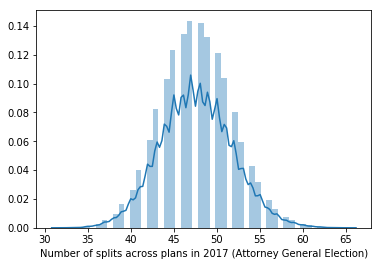

In [46]:
sns.distplot(df['nb_splits'],
             rug=False, 
             hist=True,
             kde=True,
             axlabel = 'Number of splits across plans in 2017 (Attorney General Election)')

## Number of cuts

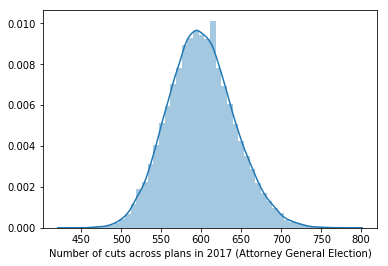

In [8]:
sns.distplot(df['nb_cuts'],
             rug=False, 
             hist=True,
             kde=True,
             axlabel = 'Number of cuts across plans in 2017 (Attorney General Election)')

## Percentage of votes for Democrats

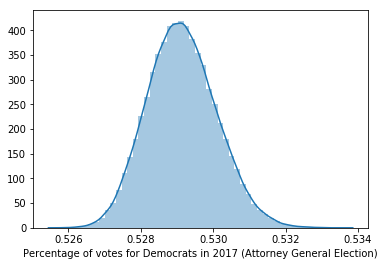

In [47]:
sns.distplot(df['perc_dem_vote'],
             rug=False, 
             hist=True,
             kde=True,
             axlabel = 'Percentage of votes for Democrats in 2017 (Attorney General Election)')

## Percentage of votes for Democrats in average per district

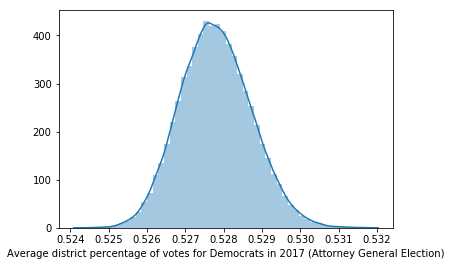

In [48]:
sns.distplot(df['mean_dem_distric_vote_share'],
             rug=False, 
             hist=True,
             kde=True,
             axlabel = 'Average district percentage of votes for Democrats in 2017 (Attorney General Election)')

---
# Plot 2 metrics against each other


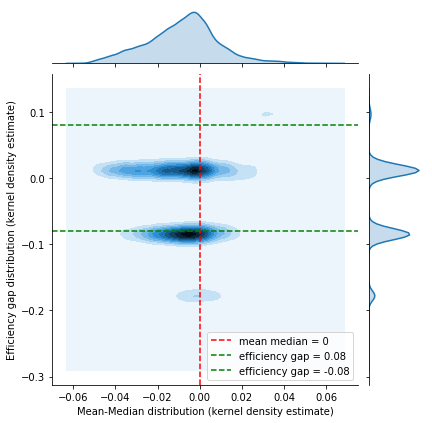

In [61]:
a = sns.jointplot(x="election_ATG17_mms", y="election_ATG17_egs", data=df,
             kind="kde")
a.ax_joint.axvline(0, color='r', linestyle='--', label = 'mean median = 0')
a.ax_joint.axhline(0.08, color='g', linestyle='--', label = 'efficiency gap = 0.08')
a.ax_joint.axhline(-0.08, color='g', linestyle='--', label = 'efficiency gap = -0.08')
a.ax_joint.set_xlabel("Mean-Median distribution (kernel density estimate)")
a.ax_joint.set_ylabel("Efficiency gap distribution (kernel density estimate)")
a.ax_joint.legend()

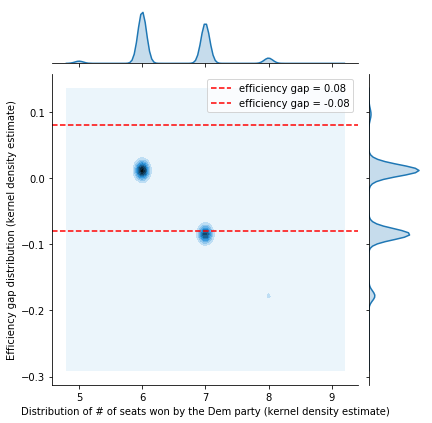

In [62]:
a = sns.jointplot(x="election_ATG17_hmss", y="election_ATG17_egs", data=df,
             kind="kde")
a.ax_joint.axhline(0.08, color='r', linestyle='--', label = 'efficiency gap = 0.08')
a.ax_joint.axhline(-0.08, color='r', linestyle='--', label = 'efficiency gap = -0.08')
a.ax_joint.set_xlabel("Distribution of # of seats won by the Dem party (kernel density estimate)")
a.ax_joint.set_ylabel("Efficiency gap distribution (kernel density estimate)")
a.ax_joint.legend()

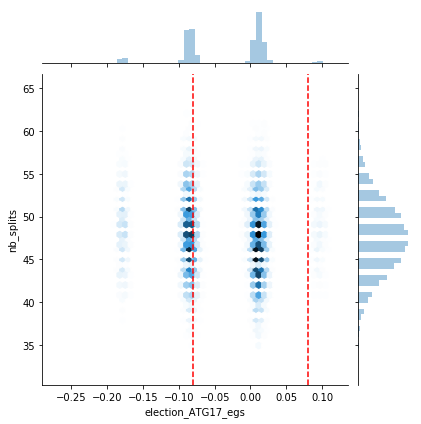

In [39]:
a = sns.jointplot(x="election_ATG17_egs", y="nb_splits", data=df,
             kind="hex")
a.ax_joint.axvline(0.08, color='r', linestyle='--')
a.ax_joint.axvline(-0.08, color='r', linestyle='--')

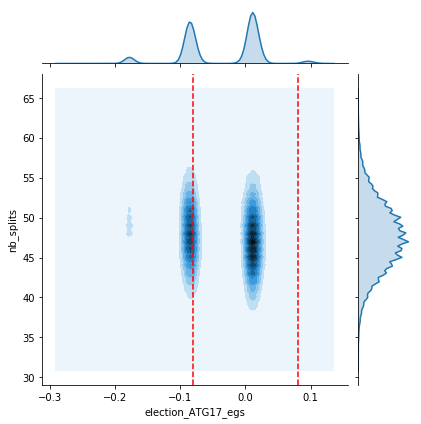

In [40]:
a = sns.jointplot(x="election_ATG17_egs", y="nb_splits", data=df,
             kind="kde")
a.ax_joint.axvline(0.08, color='r', linestyle='--')
a.ax_joint.axvline(-0.08, color='r', linestyle='--')

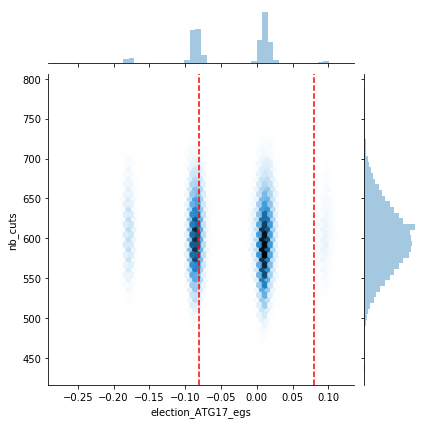

In [41]:
a = sns.jointplot(x="election_ATG17_egs", y="nb_cuts", data=df,
             kind="hex")
a.ax_joint.axvline(0.08, color='r', linestyle='--')
a.ax_joint.axvline(-0.08, color='r', linestyle='--')

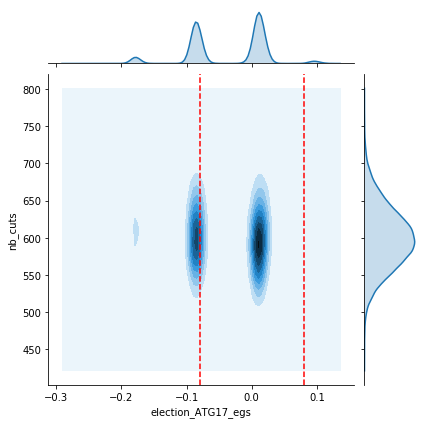

In [42]:
a = sns.jointplot(x="election_ATG17_egs", y="nb_cuts", data=df,
             kind="kde")
a.ax_joint.axvline(0.08, color='r', linestyle='--')
a.ax_joint.axvline(-0.08, color='r', linestyle='--')

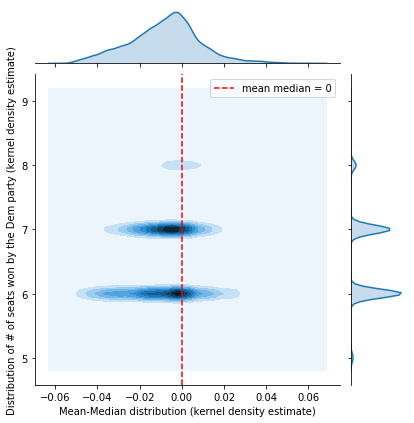

In [63]:
a = sns.jointplot(x="election_ATG17_mms", y="election_ATG17_hmss", data=df,
             kind="kde")
a.ax_joint.axvline(0, color='r', linestyle='--', label = 'mean median = 0')
a.ax_joint.set_xlabel("Mean-Median distribution (kernel density estimate)")
a.ax_joint.set_ylabel("Distribution of # of seats won by the Dem party (kernel density estimate)")
a.ax_joint.legend()

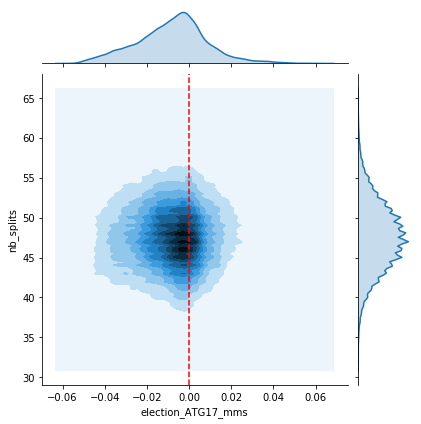

In [43]:
a = sns.jointplot(x="election_ATG17_mms", y="nb_splits", data=df,
             kind="kde")
a.ax_joint.axvline(0, color='r', linestyle='--')

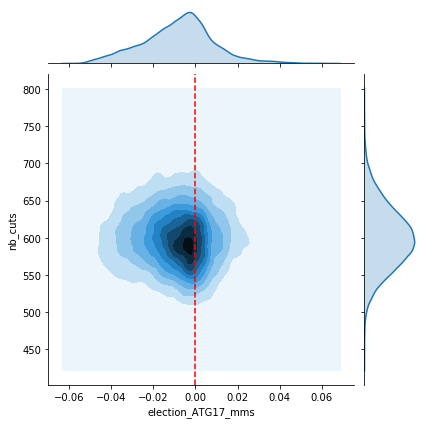

In [44]:
a = sns.jointplot(x="election_ATG17_mms", y="nb_cuts", data=df,
             kind="kde")
a.ax_joint.axvline(0, color='r', linestyle='--')

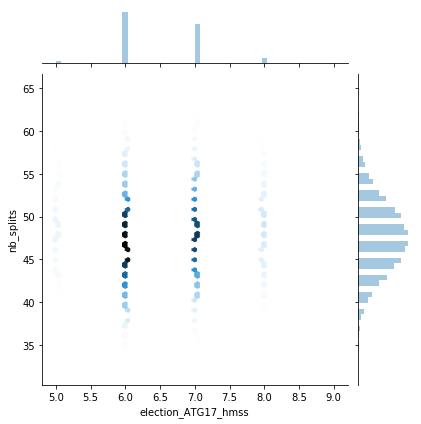

In [17]:
sns.jointplot(x="election_ATG17_hmss", y="nb_splits", data=df,
             kind="hex")

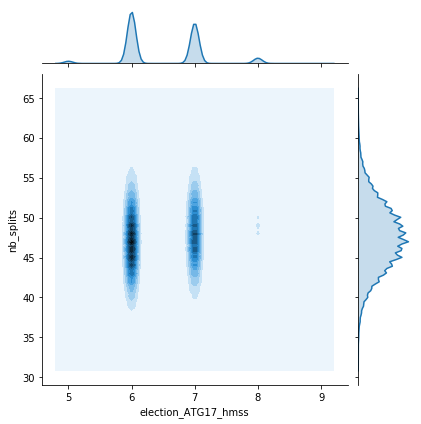

In [13]:
sns.jointplot(x="election_ATG17_hmss", y="nb_splits", data=df,
             kind="kde")

No handles with labels found to put in legend.


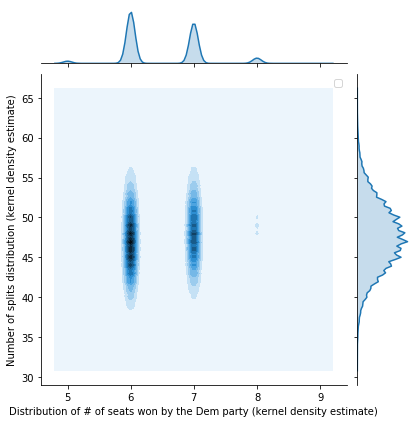

In [10]:
a = sns.jointplot(x="election_ATG17_hmss", y="nb_splits", data=df,
             kind="kde")
a.ax_joint.set_xlabel("Distribution of # of seats won by the Dem party (kernel density estimate)")
a.ax_joint.set_ylabel("Number of splits distribution (kernel density estimate)")
a.ax_joint.legend()

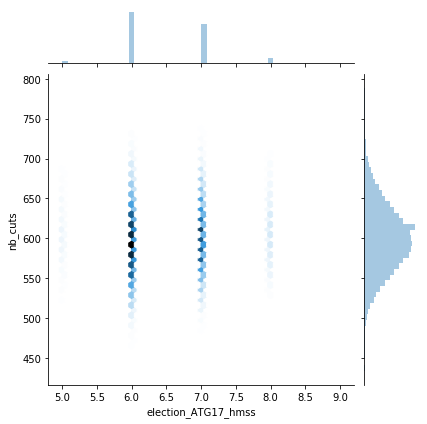

In [18]:
sns.jointplot(x="election_ATG17_hmss", y="nb_cuts", data=df,
             kind="hex")

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


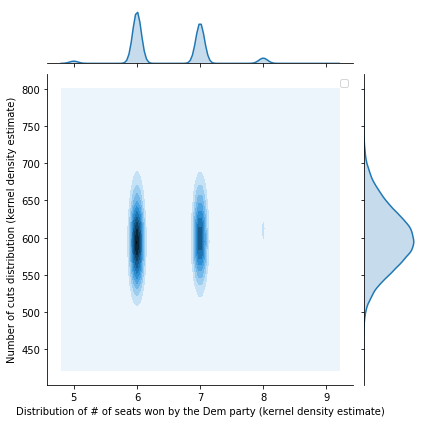

In [9]:
a = sns.jointplot(x="election_ATG17_hmss", y="nb_cuts", data=df,
             kind="kde")
a.ax_joint.set_xlabel("Distribution of # of seats won by the Dem party (kernel density estimate)")
a.ax_joint.set_ylabel("Number of cuts distribution (kernel density estimate)")
a.ax_joint.legend()

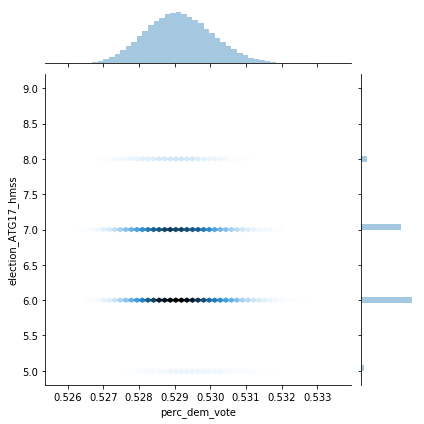

In [52]:
sns.jointplot(x="perc_dem_vote", y="election_ATG17_hmss", data=df,
             kind="hex")

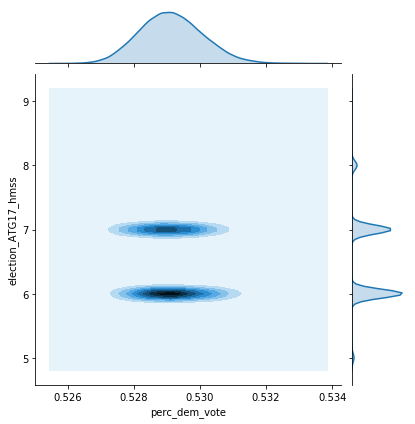

In [15]:
sns.jointplot(x="perc_dem_vote", y="election_ATG17_hmss", data=df,
             kind="kde")

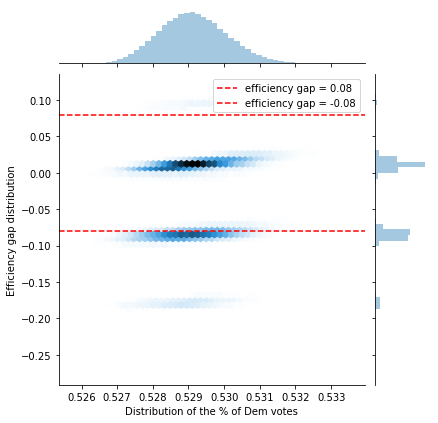

In [66]:
a = sns.jointplot(x="perc_dem_vote", y="election_ATG17_egs", data=df,
             kind="hex")
a.ax_joint.axhline(0.08, color='r', linestyle='--', label = 'efficiency gap = 0.08')
a.ax_joint.axhline(-0.08, color='r', linestyle='--', label = 'efficiency gap = -0.08')
a.ax_joint.set_xlabel("Distribution of the % of Dem votes")
a.ax_joint.set_ylabel("Efficiency gap distribution")
a.ax_joint.legend()

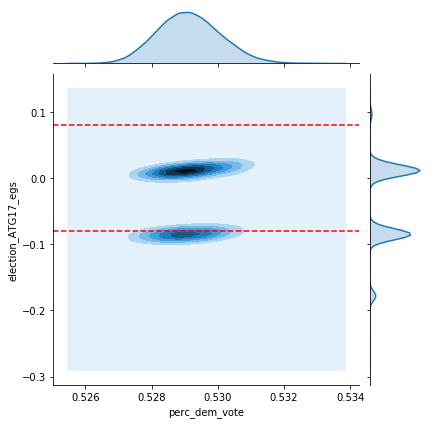

In [47]:
a= sns.jointplot(x="perc_dem_vote", y="election_ATG17_egs", data=df,
             kind="kde")
a.ax_joint.axhline(0.08, color='r', linestyle='--')
a.ax_joint.axhline(-0.08, color='r', linestyle='--')

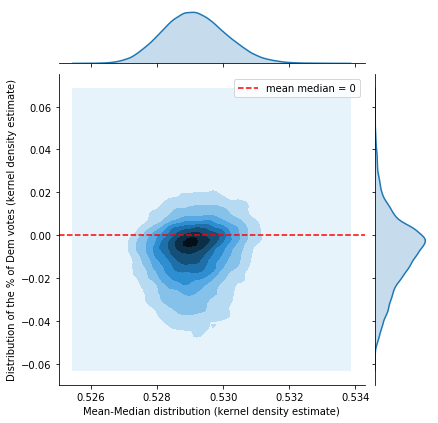

In [64]:
a = sns.jointplot(x="perc_dem_vote", y="election_ATG17_mms", data=df,
             kind="kde")
a.ax_joint.axhline(0, color='r', linestyle='--', label = 'mean median = 0')
a.ax_joint.set_xlabel("Mean-Median distribution (kernel density estimate)")
a.ax_joint.set_ylabel("Distribution of the % of Dem votes (kernel density estimate)")
a.ax_joint.legend()

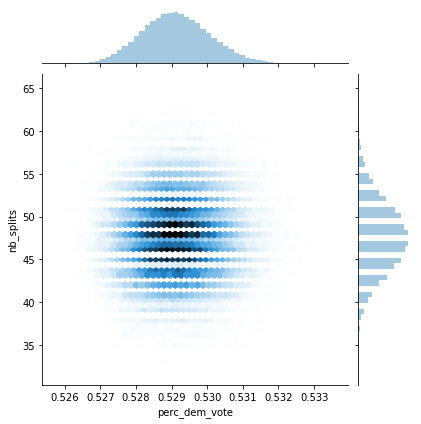

In [55]:
sns.jointplot(x="perc_dem_vote", y="nb_splits", data=df,
             kind="hex")

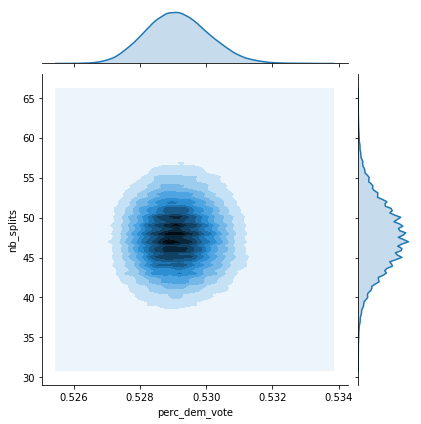

In [18]:
sns.jointplot(x="perc_dem_vote", y="nb_splits", data=df,
             kind="kde")

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


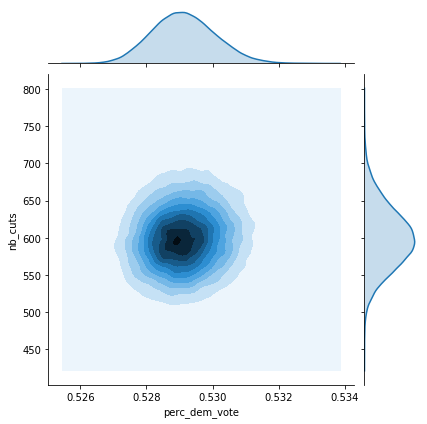

In [6]:
sns.jointplot(x="perc_dem_vote", y="nb_cuts", data=df,
             kind="kde")

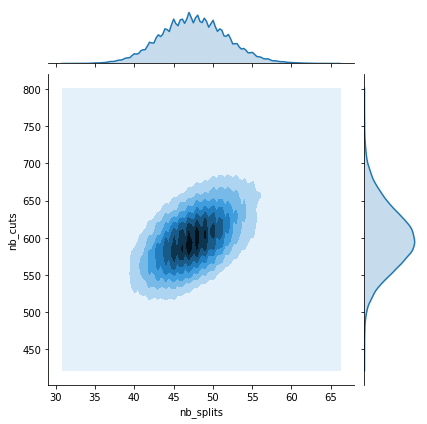

In [57]:
sns.jointplot(x="nb_splits", y="nb_cuts", data=df,
             kind="kde")

# pairwise plots

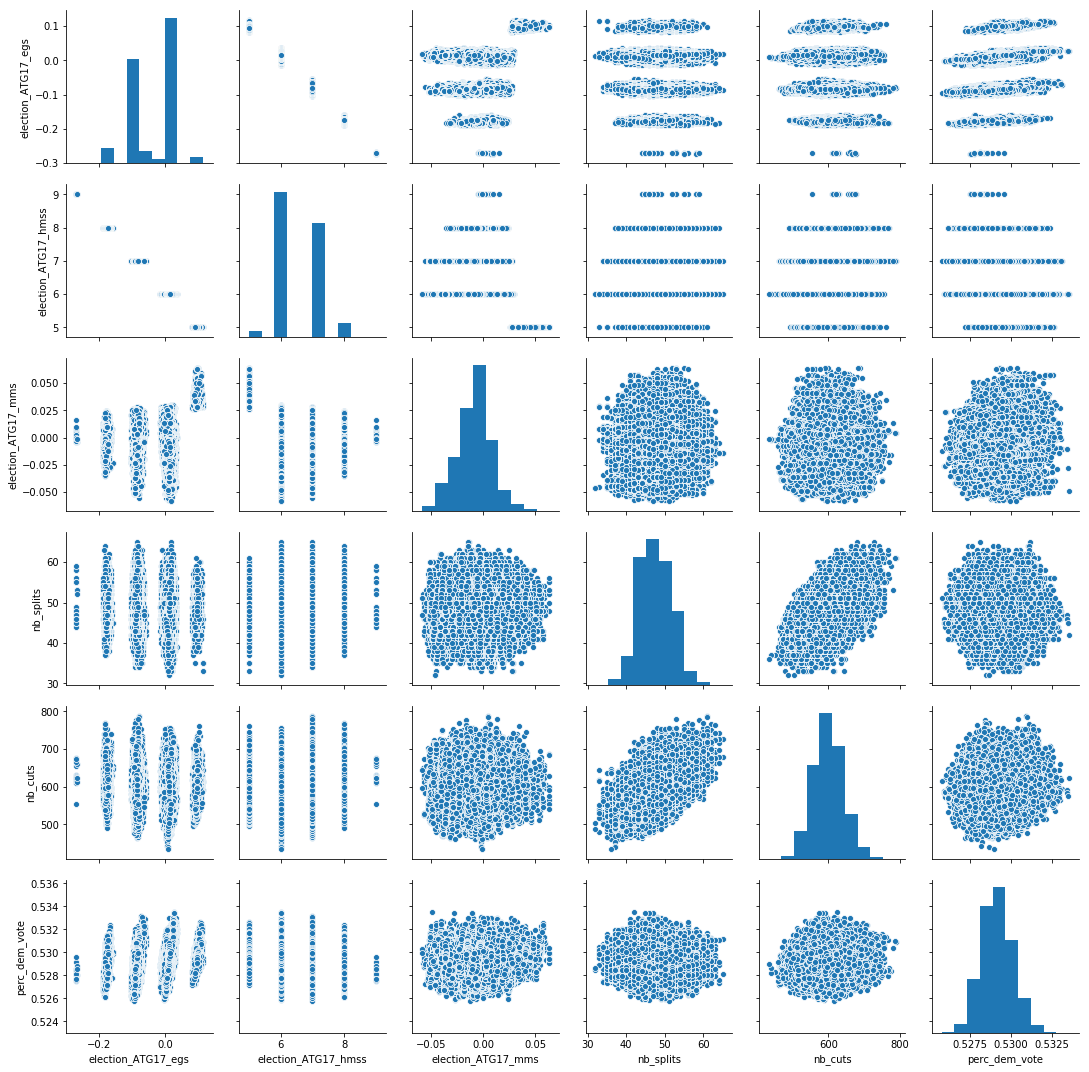

In [58]:
sns.pairplot(df)

# Visualize seats-votes curve

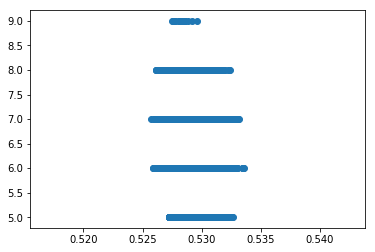

In [52]:
plt.scatter(df['perc_dem_vote'], df['election_ATG17_hmss'] )

# Plot metrics based on selection other metrics

In [55]:
def selection_plot(d, # data frame
                   x, # x axis variable
                   y, # y axis variable
                   filter_x_min = False,
                   filter_x_max = False,
                   filter_y_min = False,
                   filter_y_max = False):
    # filter
    if filter_x_min:
        d = d.loc[d[x] >= filter_x_min]
    if filter_x_max:
        d = d.loc[d[x] <= filter_x_max]
    if filter_y_min:
        d = d.loc[d[x] >= filter_x_min]
    if filter_y_max:
        d = d.loc[d[y] <= filter_y_max]
    
    # plot
    a = sns.jointplot(x=x, y=y, data=df,
             kind="kde")
    
    if x == 'election_ATG17_mms':
        a.ax_joint.axvline(0, color='r', linestyle='--')        
        
    elif y == 'election_ATG17_mms':
        a.ax_joint.axhline(0, color='r', linestyle='--')
    elif x == 'election_ATG17_egs':
        a.ax_joint.axvline(0.08, color='r', linestyle='--')
        a.ax_joint.axvline(-0.08, color='r', linestyle='--')
    elif y == 'election_ATG17_egs':
        a.ax_joint.axhline(0.08, color='r', linestyle='--')
        a.ax_joint.axhline(-0.08, color='r', linestyle='--')
    return(d)

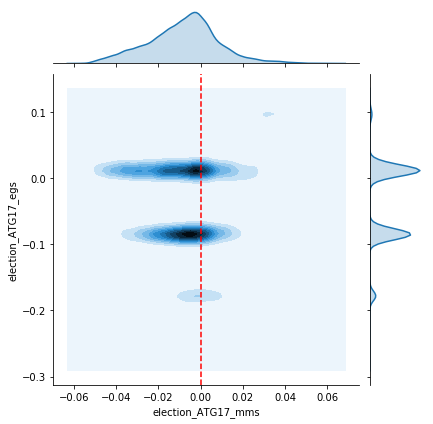

In [56]:
d1 = selection_plot(d = df,
                   x = 'election_ATG17_mms',
                   y = 'election_ATG17_egs',
                   filter_x_min = -0.025,
                   filter_x_max = 0.025,
                   filter_y_min = False,
                   filter_y_max = False)

# Geo data

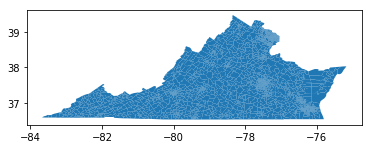

In [2]:
geo_dir = "/Users/nnguyen/Dropbox (MIT)/Classes/6_984_f_project/project_git/data/VA_data/"
df = gpd.read_file(geo_dir + "va_precincts_all.shx")
df.plot()
plt.show()

In [6]:
df.iloc[0]

geometry    POLYGON ((-76.27206199999999 36.918211, -76.27...
Name: 0, dtype: object